In [163]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

In [5]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k )+ distance(instance, trainingSet[x], k)
        distances.append((trainingSet[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [6]:
def nearestClass(neighbors):
    classVote = {}
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response]+=1 
        else:
            classVote[response]=1
    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [7]:
def getAccuracy(testSet, predictions):
    correct = 0 
    for x in range (len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

In [8]:
dataset = []
def loadDataset(filename , split , trSet , teSet):
    with open('D:\Data\my.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  
    for x in range(len(dataset)):
        if random.random() <split :      
            trSet.append(dataset[x])
        else:
            teSet.append(dataset[x])  
trainingSet = []
testSet = []
loadDataset("my.dat" , 0.66, trainingSet, testSet)

In [9]:
def distance(instance1 , instance2 , k ):
    distance =0 
    mm1 = instance1[0] 
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1)) 
    distance+=(np.dot(np.dot((mm2-mm1).transpose() , np.linalg.inv(cm2)) , mm2-mm1 )) 
    distance+= np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance-= k
    return distance

In [17]:
accuracy = []
accuracy = [ 0.693076923076923, 0.693076923076923, 0.6676923076923077, 0.693076923076923, 0.703076923076923, 0.733076923076923, 0.6976923076923077, 0.6676923076923077, 0.661538461538461 ]
#for i in range(1,10):
#    leng = len(testSet)
#    predictions = []
#    for x in range (leng):
#        predictions.append(nearestClass(getNeighbors(trainingSet ,testSet[x] ,i))) 
#    accuracy.append(getAccuracy(testSet , predictions))

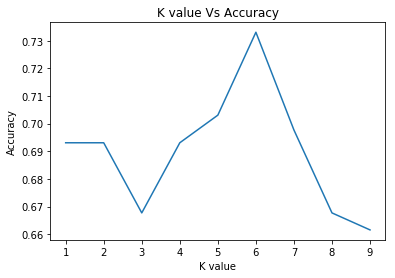

In [18]:
k = [1,2,3,4,5,6,7,8,9]  
plt.plot(k, accuracy)
plt.title('K value Vs Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [19]:
dataset = []
with open('D:\Data\my.dat','rb') as f:
    while True:
        
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break  

In [20]:
def column(matrix, i):
    return [row[i] for row in matrix]
df = column(dataset,0)
output = column(dataset,2)

In [21]:
data = pd.DataFrame(df)
data.columns = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13']
data['Gerne'] = output

In [34]:
scalar = StandardScaler()
x  = scalar.fit_transform(np.array(data.iloc[:,0:12],dtype = float))

In [35]:
train, validate, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])
train1 = train.drop('Gerne',axis='columns')
y_train = train['Gerne']
test1 = test.drop('Gerne',axis='columns')
y_test = test['Gerne']
val1 = validate.drop('Gerne',axis='columns')
y_val = validate['Gerne']

In [140]:
arr = data.values
X = arr[:,:12]
Y = arr[:,13]

In [141]:
def func(model):
    rkf = RepeatedKFold(n_splits=24, n_repeats=2, random_state=1)
    my_score=[]
    for train_index, test_index in rkf.split(X):
         X_train, X_test = X[train_index], X[test_index] 
         y_train, y_test = Y[train_index], Y[test_index]
         model.fit(X_train,y_train)
         my_score.append(model.score(X_test,y_test))
    return my_score

Text(0,0.5,'accuracy')

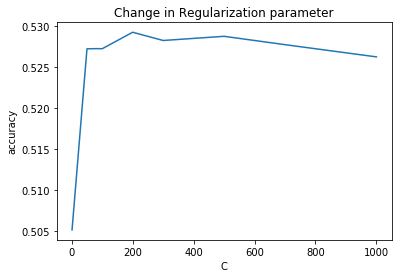

In [233]:
c = [1,50,80,100,200,300,500,700,1000]
logacc=[]
for i in c:
    model = LogisticRegression(solver = 'liblinear',random_state=0,C=i,penalty='l2',multi_class='ovr')
    my_score=func(model)
    logacc.append(np.mean(my_score))
plt.plot(c,logacc)
plt.title("Change in Regularization parameter")
plt.xlabel("C")
plt.ylabel("accuracy")

In [224]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(data.drop('Gerne',axis='columns'))
Y_pca = data['Gerne']

In [225]:
def func1(model):
    rkf = RepeatedKFold(n_splits=24, n_repeats=2, random_state=1)
    my_score=[]
    for train_index, test_index in rkf.split(X):
         X_train, X_test = X_pca[train_index], X_pca[test_index] 
         y_train, y_test = Y_pca[train_index], Y_pca[test_index]
         model.fit(X_train,y_train)
         my_score.append(model.score(X_test,y_test))
    return my_score

Text(0,0.5,'accuracy')

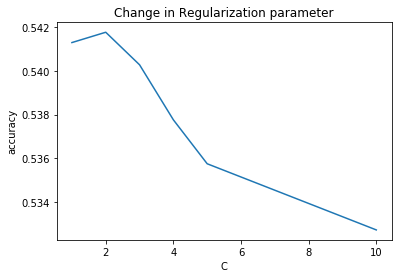

In [228]:
c = [1,2,3,4,5,10]
logacc=[]
for i in c:
    model = LogisticRegression(solver = 'liblinear',random_state=0,C=i,penalty='l2',multi_class='ovr')
    my_score=func1(model)
    logacc.append(np.mean(my_score))
plt.plot(c,logacc)
plt.title("Change in Regularization parameter")
plt.xlabel("C")
plt.ylabel("accuracy")

In [36]:
clf = LogisticRegression(random_state=0).fit(train1, y_train)
predi = clf.predict(test1)
print(accuracy_score(y_test,predi))
pv = clf.predict(val1)
print(accuracy_score(y_val,pv))

0.48
0.52


In [146]:
def train_using_gini(X_train, X_test, y_train,i): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=i, min_samples_leaf=10) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [147]:
def tarin_using_entropy(X_train, X_test, y_train,i): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = i, min_samples_leaf = 10) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [148]:
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [149]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
    return accuracy_score(y_test,y_pred)*100

In [158]:
gini_test_acc = []
gini_val_acc = []
entropy_test_acc = []
entropy_val_acc = []
for i in range(1,15):
    clf_gini = train_using_gini(train1, test1, y_train,i) 
    clf_entropy = tarin_using_entropy(train1, test1, y_train,i) 
      
    print("Results Using Gini Index:") 
    y_pred_gini = prediction(test1, clf_gini) 
    gini_test_acc.append(cal_accuracy(y_test, y_pred_gini)) 
      
    print("Results Using Entropy:")
    y_pred_entropy = prediction(test1, clf_entropy) 
    entropy_test_acc.append(cal_accuracy(y_test, y_pred_entropy))

    y_val_gini = prediction(val1,clf_gini)
    gini_val_acc.append(cal_accuracy(y_val,y_val_gini))

    y_val_entropy = prediction(val1, clf_entropy) 
    entropy_val_acc.append(cal_accuracy(y_val, y_val_entropy))

Results Using Gini Index:
Predicted values:
[2 4 4 4 2 4 4 2 4 4 2 2 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 2 4 4 4 4 4 4 4 2 4 2 4 4 4 2 2 4 2 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 2
 4 4 4 4 2 4 4 4 4 2 4 2 4 2 4 4 4 4 4 2 4 4 4 4 4 4 4 4 2 4 2 4 4 4 4 4 4
 4 2 4 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 4 2 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 2 4
 4 2 4 4 4 4 4 4 4 4 2 4 4 4 4 4 2 2 4 4 4 2 4 4 4 2 4 4 4 4 4 4 2 4 4 4 4
 4 4 4 4 4 2 4 4 4 4 2 4 4 4 2]
Confusion Matrix:  [[ 0  8  0 16  0  0  0  0  0  0]
 [ 0 13  0  4  0  0  0  0  0  0]
 [ 0  6  0 14  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0]
 [ 0 10  0 12  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0]
 [ 0  1  0 23  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]]
Accuracy :  15.5
Results Using Entropy:
Predicted values:
[2 4 4 4 2 4 4 2 4 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 4 4 4 4 4 4 4 2 2 4 4
 2 4 4 2 4 4 4 2 4 4 4 2 4 2 4 2 4 2 2 4 2 4 4 4 2 4 4 4 4 4 2 4 4

Predicted values:
[ 2  4  4  8  1  8  7  2  9  1  6  2  7  9  8  9  8  8  6  4  4  9  4  1
  9  7  9 10  7  8 10  8  5  3  2 10  7  3  7  8  6  4  1  7  1 10  6  7
  2  1  1  8  6  9  6  6  9  2  7  9  3  5  7  1  7  3  6  2  1  5  7  6
  1  1  6  3  7  1  1  4  1  9  9  2  9  6  8  1  9 10  3  8  4  1  8 10
 10  9  3  3  5  2  1  9  2 10  8  5  2  8  5  4  2  4 10  6  4  3  3  4
 10  1  8  1  8  8 10  1  9  9  6  4  8  8  3  9 10  4 10  2  9 10  7  1
  6 10  2  7  4  6  5  4  5  2  8  8 10  1  1  7  5  4  6  8  1  1 10  9
  2  6  4  2  9  1  2  7  8  8  4  7  2  7  4  2 10  3  5  4  8 10  2  7
  6 10  1  6 10  4  3  6]
Confusion Matrix:  [[12  2  2  1  0  4  3  0  0  0]
 [ 0 12  0  1  0  4  0  0  0  0]
 [ 3  1  1  2  1  2  0  3  2  5]
 [ 0  0  1  4  0  0  2  1  4  6]
 [ 0  1  2  0  4  2  4  3  4  2]
 [ 3  3  2  6  0  5  1  0  1  1]
 [ 4  0  0  0  1  0  9  0  0  1]
 [ 0  1  1  3  0  0  0 16  3  4]
 [ 4  1  1  2  4  3  1  1  7  0]
 [ 1  0  3  3  0  0  0  1  0  2]]
Accuracy :  36.0
Resul

Predicted values:
[ 1  2  8  4  7 10  2  6  7  5  2  8  8  4  8  7  7  6  4  1  1  2  8  2
  6  3  1  3  9  3  7 10  1  8  7  3  1  8  4  4  1  2  1  1  4  5 10 10
  9  2  2  8 10  1  3  3  9  1  2  8  3 10  4  8  2  2  3  6  1  7  8  6
  9  7  2  7  6  7  1  8  1  1  8  1  9  1  5  7  3  5  8  6  7 10  8  4
  7  6  1  2  8  7  1  9 10  3  2  1  2  4  9  1  7 10  3  2  2  6  7  2
  3  2  7  2  6  4  2  2 10  6  7  3  1  8  6  8  8  2  7 10  8  3  8 10
  2  1  3  9  1  1 10  9  8  7  1  1  1  8 10 10  2  1  9  6  8  7  4 10
  5 10  8  7  4  7 10  5 10  3 10  8 10  7  3  1  1  3  4  6  5  2  6  7
  1  7  6  7  6  1  7  9]
Confusion Matrix:  [[ 7  0  0  0  0  1  1  0  0  0]
 [ 1 19  1  0  0  3  0  0  0  0]
 [ 2  4  4  2  0  2  1  1  1  3]
 [ 3  1  2  3  1  0  2  2  0  0]
 [ 2  0  2  2  3  1  2  0  0  6]
 [ 2  0  2  0  0  4  0  0  2  0]
 [ 4  0  1  0  1  0 21  1  0  3]
 [ 0  0  0  1  0  0  0 18  2  3]
 [ 3  2  1  0  1  4  0  3  6  2]
 [ 9  0  5  5  1  2  1  1  0  4]]
Accuracy :  44.5
Predi

Text(0,0.5,'accuracy')

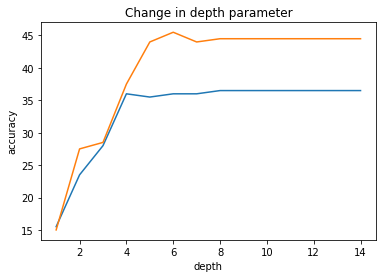

In [236]:
d = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
#blue line for test
plt.plot(d,gini_test_acc)
#orange label for validation
plt.plot(d,gini_val_acc)
plt.title("Change in depth parameter")
plt.xlabel("depth")
plt.ylabel("accuracy")

Text(0,0.5,'accuracy')

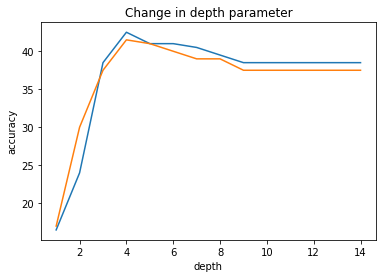

In [237]:
d = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
#blue line for test
plt.plot(d,entropy_test_acc)
#orange label for validation
plt.plot(d,entropy_val_acc)
plt.title("Change in depth parameter")
plt.xlabel("depth")
plt.ylabel("accuracy")